In [1]:
# iterate through the folder test_set and its dub folders and find the channel wise mean and std deviation of the images
import os
import numpy as np
import cv2

def get_mean_std(folder):
    means = []
    stds = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                img = cv2.imread(os.path.join(root, file), cv2.IMREAD_COLOR)
                img = img / 255.0
                mean, std = cv2.meanStdDev(img)
                means.append(mean.flatten())
                stds.append(std.flatten())
    means = np.array(means)
    stds = np.array(stds)
    mean = np.mean(means, axis=0)
    std = np.mean(stds, axis=0)
    return mean, std
    

mean, std = get_mean_std('test_set')
print('mean:', mean)
print('std:', std)

mean: [0.41353665 0.45272067 0.48671016]
std: [0.22473665 0.22447826 0.23010029]


In [5]:
# artifically augment the mean and std to make the images look like synthetic images
new_mean = [0.79, 0.59, 0.21]
new_std = [0.23, 0.23, 0.23]

# augment the images and save them in a new folder call synthetic_test_set
def augment_images(folder, new_mean, new_std):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                path = os.path.join(root, file)
                img = cv2.imread(path, cv2.IMREAD_COLOR)
                img = img / 255.0
                img = (img - mean) / std * new_std + new_mean
                img = np.clip(img, 0, 1)
                img = (img * 255.0).astype(np.uint8)
                cv2.imwrite(path.replace('test_set', 'synthetic_test_set'), img)

augment_images('test_set', new_mean, new_std)

In [15]:
def get_means_stds(folder):
    means = []
    stds = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                img = cv2.imread(os.path.join(root, file), cv2.IMREAD_COLOR)
                img = img / 255.0
                mean, std = cv2.meanStdDev(img)
                means.append(mean.flatten())
                stds.append(std.flatten())
    means = np.array(means)
    stds = np.array(stds)
    return means, stds

means, stds = get_means_stds('test_set')
synthetic_means, synthetic_stds = get_means_stds('synthetic_test_set')
means, stds, synthetic_means, synthetic_stds

(array([[0.5708924 , 0.53632089, 0.47257099],
        [0.16271338, 0.26151748, 0.40943339],
        [0.34651128, 0.41940292, 0.50500801],
        ...,
        [0.38138074, 0.43883565, 0.49351707],
        [0.51109877, 0.54580956, 0.57482775],
        [0.56323901, 0.55650416, 0.54448713]]),
 array([[0.26376447, 0.25497768, 0.21260818],
        [0.12813202, 0.12632485, 0.13452211],
        [0.19335214, 0.20640269, 0.23984252],
        ...,
        [0.08254295, 0.07785085, 0.07163291],
        [0.27531943, 0.25909912, 0.24581854],
        [0.34390641, 0.32953049, 0.32829191]]),
 array([[0.84700046, 0.66534895, 0.21370356],
        [0.53133132, 0.39207712, 0.1510772 ],
        [0.71238612, 0.55365093, 0.2570874 ],
        ...,
        [0.75472973, 0.57415366, 0.21748064],
        [0.82659869, 0.68307431, 0.32518249],
        [0.80808973, 0.67271874, 0.30952123]]),
 array([[0.16806655, 0.24682721, 0.18655602],
        [0.13055869, 0.12898767, 0.09904253],
        [0.18511895, 0.21091432, 0.

(4046, 6) (4046,)


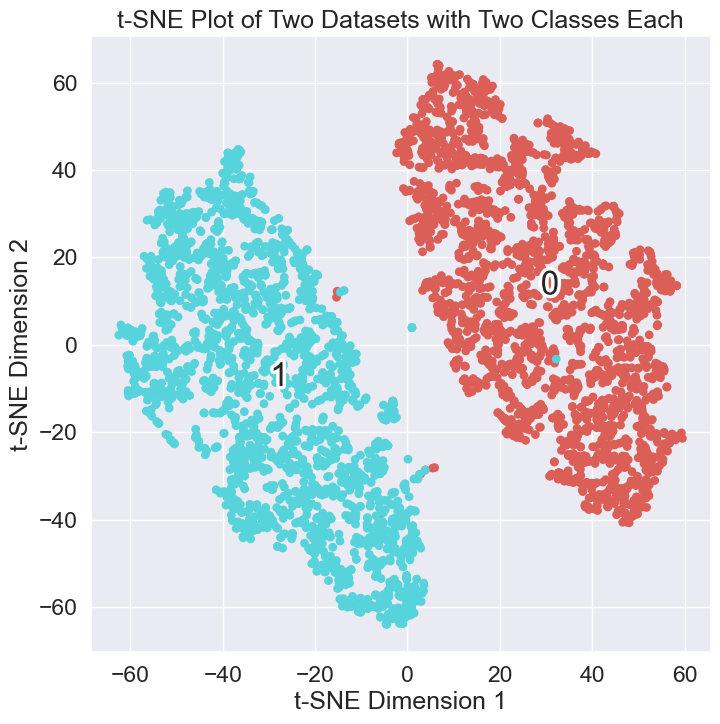

In [16]:
import os
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

def t_sne(datamean1, datamean2):

    all_X = np.vstack((datamean1, datamean2))
    all_y = np.hstack((np.zeros(datamean1.shape[0]), np.ones(datamean2.shape[0])))
    print(all_X.shape, all_y.shape)
    
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=20240220, perplexity=30)
    X_tsne = tsne.fit_transform(all_X)
    
    # We choose a color palette with seaborn.
    num_datasets = 2
    palette = np.array(sns.color_palette("hls", num_datasets))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X_tsne[:,0], X_tsne[:,1], lw=0, s=40,
                    c=palette[all_y.astype(np.int64)])
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_datasets):
        # Position of each label.
        xtext, ytext = np.median(X_tsne[all_y == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    plt.title("t-SNE Plot of Two Datasets with Two Classes Each")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")

    plt.grid(True)
    plt.show()


datamean1 = np.concatenate((means, stds), axis=1)
datamean2 = np.concatenate((synthetic_means, synthetic_stds), axis=1)
t_sne(datamean1, datamean2)
